In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt

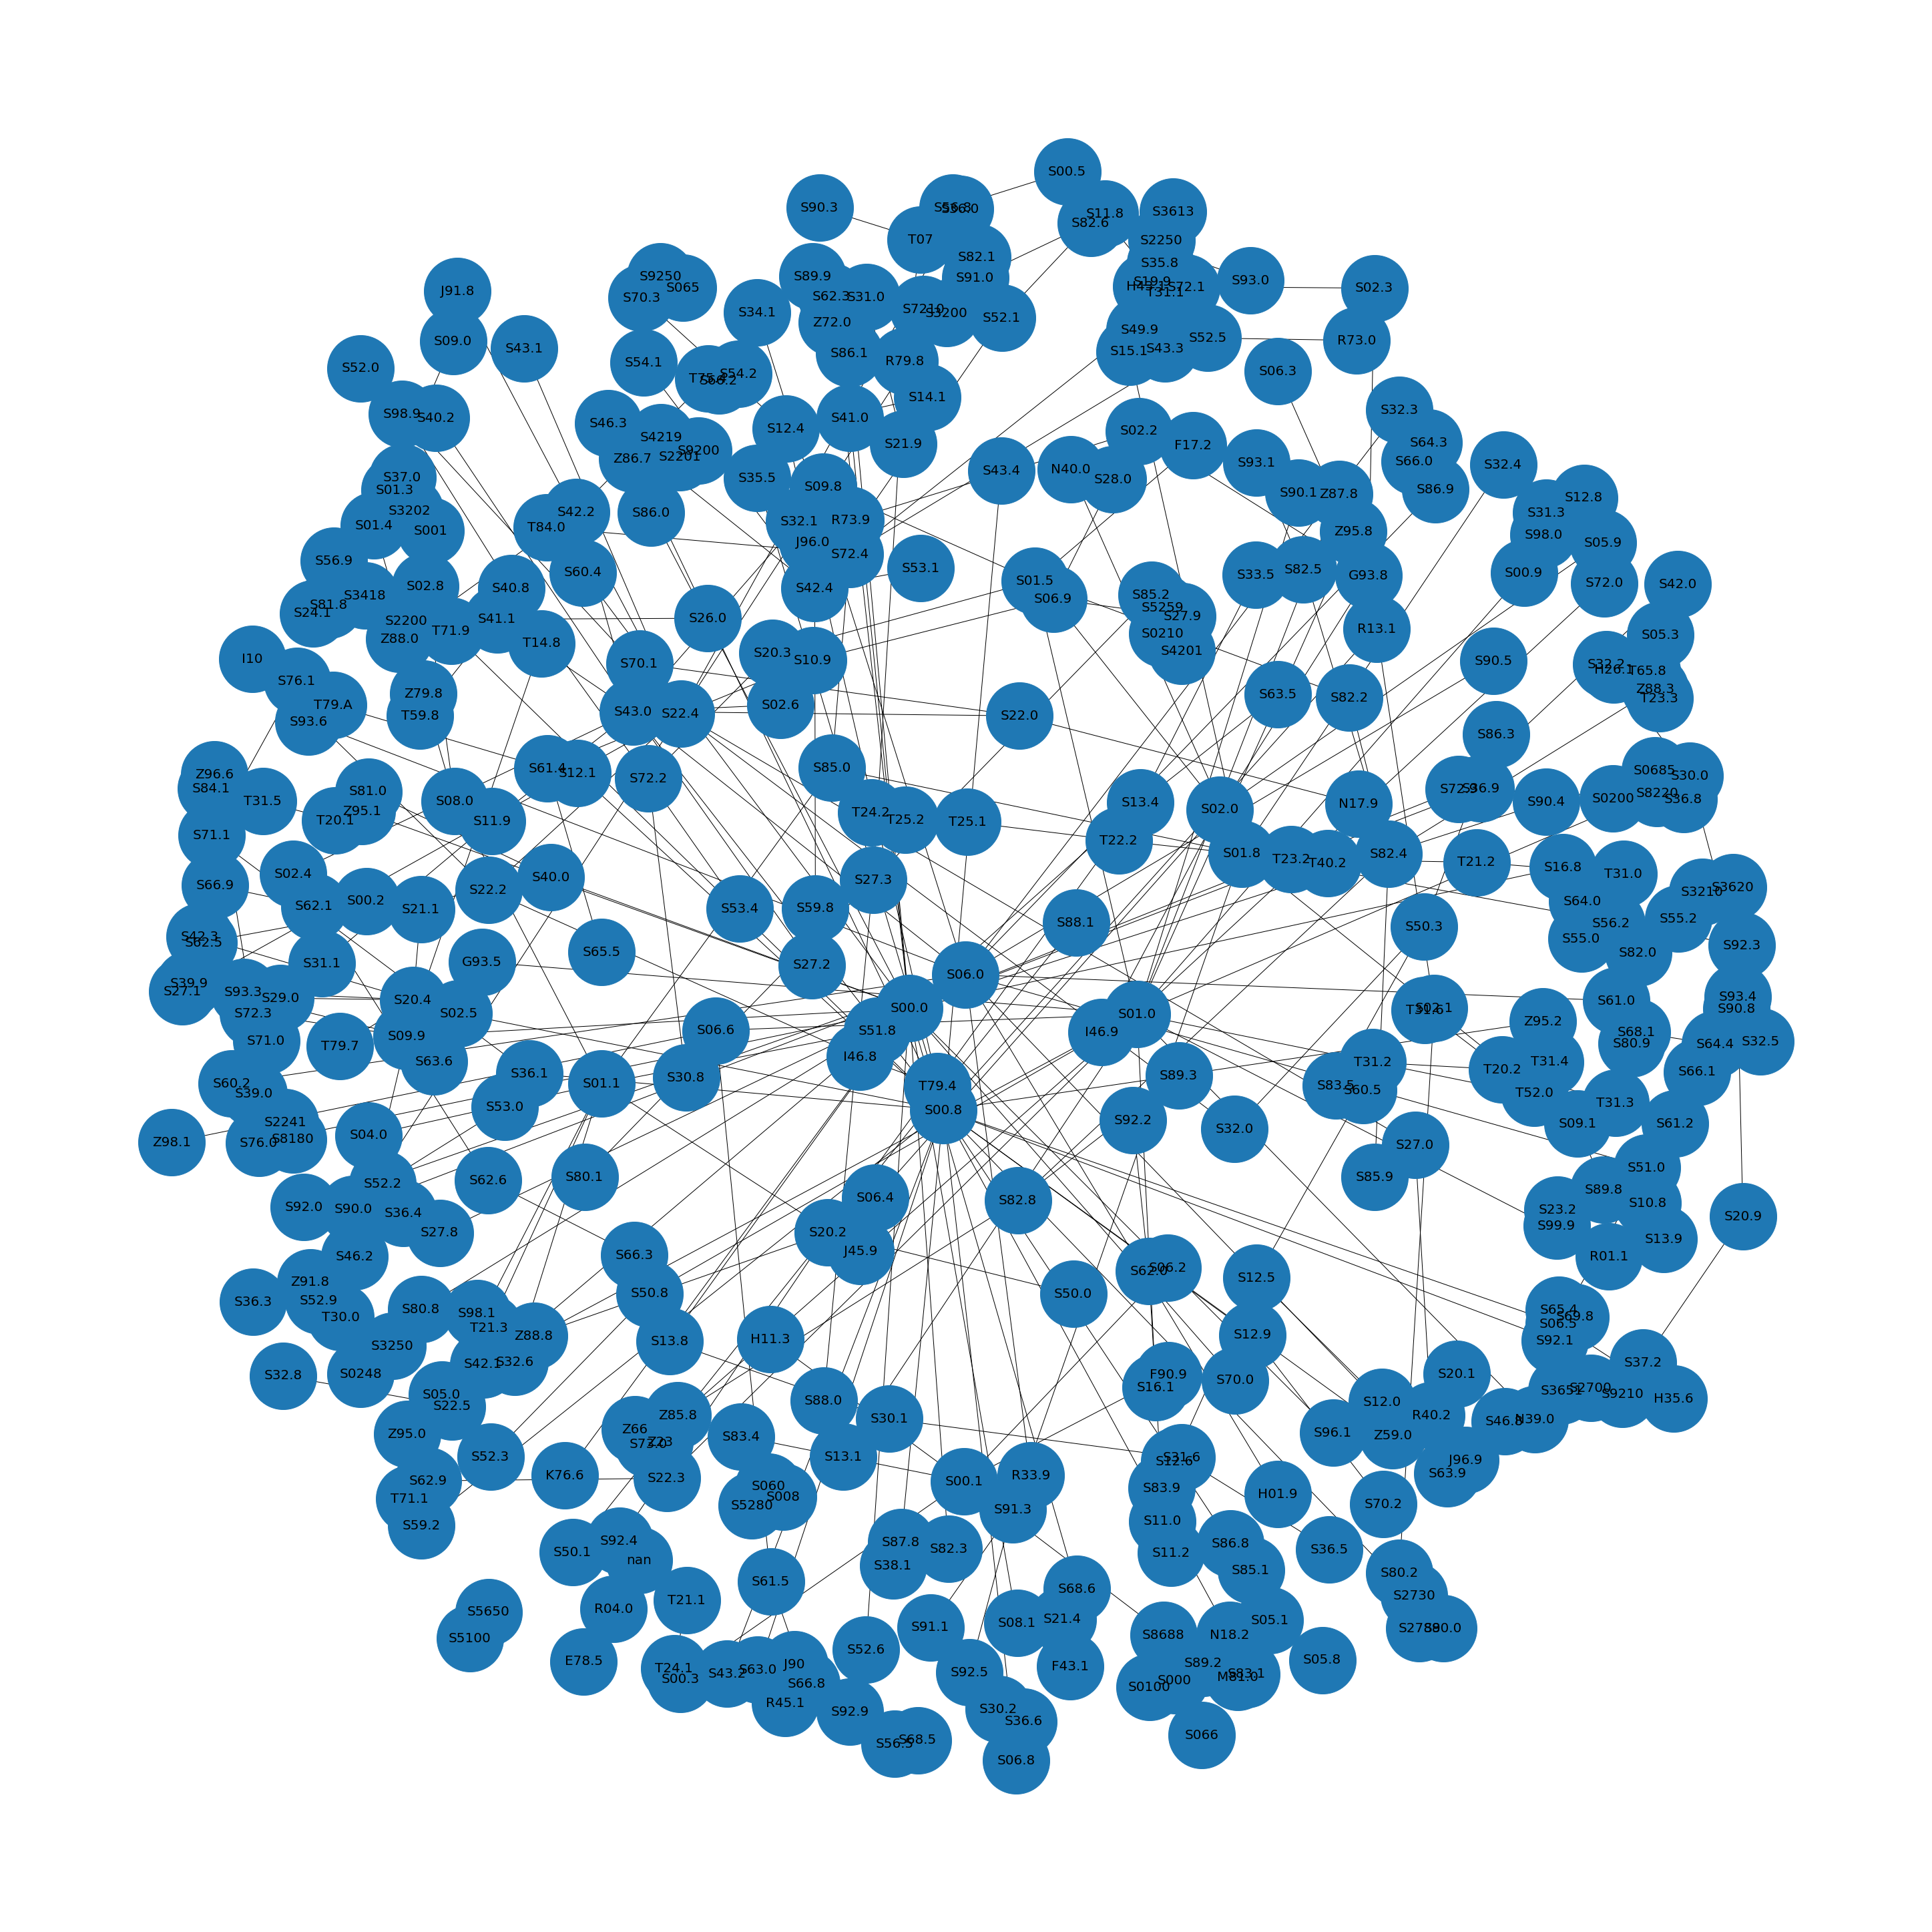

In [5]:
with open('adj_list.csv') as json_file:
    adj_list = json.load(json_file)
fig = plt.figure(1, figsize=(40, 40))
net = nx.Graph(adj_list)
nx.draw(net, node_size=10000,font_size=20, with_labels = True)

In [6]:
def findnodes(graph, source_node, degree, number, weight_thres):
    '''
    this function is to 
    - print out all of the nodes associated to the source node corresponding the number of connected edges
    - plot the subgraph from the overall graph containing the source_node

    input: 
    graph: networkx graph
    source_node: source node name
    degree: number of edges in between the source_node and the returned node
    number: number of nodes to be returned

    output: nodes which satisfy requirments as specified above

    note: essentially the idea is to extract a subgraph coming from that node
    the result of this could be further verified by using nx.descendants(graph, source_node)
    '''
    temp_graph = nx.Graph()
    result_nodes = {}
    all_nodes = [source_node]
    neighbors = [x for x in graph.neighbors(source_node)]
    weights = {}
    cur_num_edge = 1

    # iterate through current node in neighbor of the source node:

    # update node
    for cur_node in neighbors:
        weights[cur_node] = graph.get_edge_data(source_node,cur_node)['weight']
    # update result_nodes at number of edge = 1
    result_nodes[cur_num_edge] = [x for x in neighbors if weights[x]>weight_thres]
    # updates all node (all of the node which we have previously go through)
    all_nodes.extend(neighbors)
    # update neighbors information (which satistfy the weight threshold)
    neighbors = [x for x in neighbors if weights[x] > weight_thres]
    # iterate through the neighbors node, add edge to the output graph
    for ii in neighbors:
        temp_graph.add_edge(source_node, ii)

    # iterate through the neighbors of the neighbors
    while len(neighbors) != 0 and cur_num_edge <= degree:

        temp = []

        cur_num_edge += 1

        for node in neighbors:

            temp.extend([x for x in graph.neighbors(node) if x not in all_nodes])

            cur_weight = weights[node]
            for cur_node in graph.neighbors(node):
                if cur_node not in all_nodes:
                    weights[cur_node] = cur_weight * graph.get_edge_data(node, cur_node)['weight']
                    if weights[cur_node] > weight_thres:
                        temp_graph.add_edge(node, cur_node)
            all_nodes.extend(temp)
        if len(temp)!=0:
            result_nodes[cur_num_edge] = [x for x in temp if weights[x]>weight_thres]
        neighbors = [x for x in temp if weights[x]>weight_thres]
    

    #nx.draw(graph.subgraph(nx.shortest_path(graph.to_undirected(),source_node)),with_labels = True)
    

    return result_nodes, weights, temp_graph

In [7]:
k,m,g = findnodes( net, 'S20.2', 1, 5, 0.0000001)

In [8]:
k

{1: ['S50.1', 'S13.4', 'Z88.8', 'S88.1', 'S92.4', 'S50.0'],
 2: ['S33.5', 'S63.5', 'S00.0']}

In [136]:
m

{'S50.1': 0.006802721088435374,
 'S90.0': 0.00684931506849315,
 'S70.0': 0.00558659217877095,
 'S22.2': 0.004524886877828055,
 'S90.1': 0.008064516129032258,
 'S43.3': 0.007692307692307693,
 'R26.2': 0.00819672131147541,
 'S32.3': 3.164256557921717e-05,
 'S00.1': 6.063545961678389e-05}

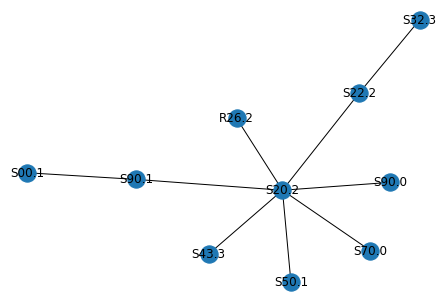

In [139]:
nx.draw(g, with_labels = True)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
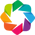

In [18]:
# starting making the chord diagram
# reference: https://coderzcolumn.com/tutorials/data-science/how-to-plot-chord-diagram-in-python-holoviews

import pandas as pd
import holoviews as hv
from holoviews import dim, opts
hv.extension("bokeh")

In [10]:
adj_list.keys

<function dict.keys>

In [55]:
# visualizing chord diagram
from_node_list = [x[0] for x in net.edges]
to_node_list = [x[1] for x in net.edges]
weight_info = [net[from_node_list[x]][to_node_list[x]]['weight'] for x in range(len(from_node_list))]
total_data_info = pd.DataFrame([from_node_list,to_node_list,weight_info]).T
total_data_info.columns = ["from","to",'Weight']
nodes = list(set(total_data_info["from"].unique().tolist() + total_data_info["to"].unique().tolist()))
nodes_dataset = hv.Dataset(pd.DataFrame(nodes, columns=["name"]))


In [56]:
nodes_dataset.data.head(
)

name
0  T75.4
1  S96.1
2  S24.1
3  T22.2
4  S56.2

In [57]:
# create the node group information
nodes_df = pd.DataFrame(nodes,columns = ['name'])
#nodes_df['index'] = list(nodes_df.index)
nodes_df = hv.Dataset(nodes_df,'index')
nodes_df.data.head()

index   name
0      0  T75.4
1      1  S96.1
2      2  S24.1
3      3  T22.2
4      4  S56.2

In [132]:
total_data_info

from     to    Weight
0    S50.3  S32.0  0.002193
1    S50.3  S83.5  0.008621
2    S50.3  S86.3  0.009091
3    S92.9  S52.6  0.011765
4    S06.6  S01.0  0.001515
..     ...    ...       ...
333  S66.2  S54.2  0.333333
334  S72.2  S20.3  0.013889
335  S9200  S2201  0.333333
336  S72.9  S00.0  0.004556
337  S08.0  S01.1     0.016

[338 rows x 3 columns]

In [68]:
%%opts Chord [height=1000 width=1000 title="Trauma Graph Connections" labels="Nodes"]
chord = hv.Chord((total_data_info,nodes_dataset))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('from').str(), 
               labels='name'))
print(chord)
chord

:Chord   [from,to]   (Weight)


:Chord   [from,to]   (Weight)

In [ ]:
# community detection parts
# we will be working on the following algorithms:
# - girvan neuman algorithms (both weighted and un-weighted)
# - asyn fluidc community detection
# - walk trap algorithm

In [157]:
# import relevant packages
# girvan newman
from networkx.algorithms import community
def heaviest(G):
    u, v, w = max(G.edges(data="weight"), key=itemgetter(2))
    return (u, v)
from networkx import edge_betweenness_centrality as betweenness
def most_central_edge(G):
    centrality = betweenness(G, weight="weight")
    return max(centrality, key=centrality.get)
# it is about the total strength of association (total weights of edges relative to total number of nodes)
# weight per edge is also another metric to determine
# 1. does it recapitulate relatinship taht we know
# 2. can we rank these 
# to analyze on the strength of the community
# Dr. Marina at HMS --> future directions of people
# 
coms = community.girvan_newman(net)#most_valuable_edge=most_central_edge)

In [149]:
def load_descriptions(nodes):
    descriptions = pd.read_csv('RDS_ICD10_DCODEDES.csv', encoding_errors='replace')
    descriptions['short_code'] = descriptions[descriptions['ICD10_DCODE'].apply(lambda code: type(code)==str and code!='-1' and code!='-2')]['ICD10_DCODE'].apply(lambda code: code[:5])
    def something(node):
        try:
            return descriptions[descriptions['short_code']==node]['ICD10_DCODEDES'].iloc[0]
        except IndexError:
            return ''
    icd_desc = {node: something(node) for node in nodes}
    desc_icd = {v: k for k,v in icd_desc.items()}
    return icd_desc, desc_icd

In [159]:
next_level_communities = next(coms)
sorted(map(sorted, next_level_communities))

StopIteration: 

In [152]:
temp = ['I10',
  'I46.8',
  'J91.8',
  'J96.9',
  'R40.2',
  'S22.2',
  'S22.4',
  'S27.0',
  'S27.1',
  'S32.0',
  'S36.0',
  'S43.1',
  'S50.3',
  'S52.0',
  'S62.5',
  'S82.1',
  'S83.5',
  'S86.3',
  'S90.3',
  'T79.4',
  'Z91.8']

In [154]:
icd_desc, desc_icd = load_descriptions(temp)

In [156]:
[icd_desc[x] for x in temp]

['Essential (primary) hypertension',
 'Cardiac arrest due to other underlying condition',
 'Pleural effusion in other conditions classified elsewhere',
 'Respiratory failure, NOS, NOS whether with hypoxia or hypercapnia',
 'Unspecified coma',
 'Unspecified fracture of sternum, initial encounter for closed fracture',
 'Multiple fractures of ribs, right side, initial encounter for closed fracture',
 'Traumatic pneumothorax, initial encounter',
 'Traumatic hemothorax, initial encounter',
 'Wedge compression fracture of NOS lumbar vertebra, initial encounter for closed fracture',
 'Unspecified injury of spleen, initial encounter',
 'Unspecified dislocation of right acromioclavicular joint, initial encounter',
 'Abrasion of right elbow, initial encounter',
 'Unspecified fracture of upper end of right ulna, initial encounter for closed fracture',
 'Fracture of unspecified phalanx of right thumb, initial encounter for closed fracture',
 'Unspecified fracture of upper end of right tibia, initi

In [142]:
len(list(coms))

0

In [135]:
len(nodes_dataset)

399

In [141]:
list(coms)

[]

In [128]:
# asyn fluidc --> doesn't work --> require connected graph
coms2= community.asyn_fluid.asyn_fluidc(net,k=10)

NetworkXError: Fluid Communities require connected Graphs.

In [129]:
coms2= community.label_propagation.asyn_lpa_communities(net)

In [131]:
list(coms2)

[{'S32.0', 'S50.3', 'S83.5', 'S86.3'},
 {'S52.6', 'S92.9'},
 {'G93.5',
  'N39.0',
  'R01.1',
  'S01.0',
  'S06.6',
  'S13.1',
  'S16.1',
  'S42.1',
  'S50.8',
  'S52.3',
  'S72.0',
  'S73.0',
  'S83.9',
  'S90.1',
  'Z87.8',
  'Z95.8',
  'Z98.1'},
 {'N40.0', 'S01.8', 'S15.1', 'S32.4', 'S92.3'},
 {'S40.0', 'S81.0'},
 {'H01.9',
  'R33.9',
  'S06.0',
  'S32.3',
  'S34.1',
  'S51.0',
  'S60.2',
  'S61.0',
  'S63.9',
  'S86.9',
  'S90.0',
  'S92.0',
  'S93.6'},
 {'K76.6',
  'S00.0',
  'S08.1',
  'S13.8',
  'S16.8',
  'S27.8',
  'S30.1',
  'S36.4',
  'S36.8',
  'S36.9',
  'S42.0',
  'S60.4',
  'S62.3',
  'S68.6',
  'S70.0',
  'S72.9',
  'S76.0',
  'S82.3',
  'S86.0',
  'S86.1',
  'S90.4',
  'S90.5',
  'S96.1',
  'Z95.0',
  'Z95.1'},
 {'S09.9', 'S39.9', 'S72.3', 'T14.8', 'T30.0', 'Z96.6'},
 {'I46.9', 'S02.0', 'S05.9', 'S06.4'},
 {'S20.4', 'S21.1', 'S29.0', 'S63.6', 'S93.3', 'T79.7'},
 {'S06.9', 'S27.9', 'S28.0'},
 {'H35.6', 'S06.5', 'S90.8'},
 {'S80.8', 'S98.1'},
 {'S82.4', 'S85.9', 'Z88.3'},